## Ingest (1.0)

#### 1.1: Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import plotly
import plotly.express as px
import plotly.graph_objects as go
#import pandas_profiling as pp
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
import seaborn as sns

In [26]:
from sklearn.ensemble import RandomForestClassifier   
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1.2: Crafting Display Options

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### 1.3: Loading Data

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.read_csv('sample_submission.csv')

#### 1.4: Describing Data

In [31]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


In [32]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

## EDA (2.0)

#### 2.1: Seperate the target and independant variables

In [33]:
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [34]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

1

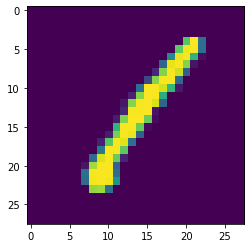

In [35]:
print_image(0, df_x)
df_y[0]

#### 2.2: Histogram of Values

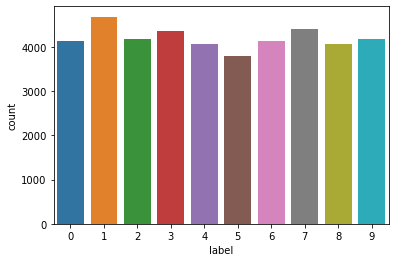

In [36]:
# Print data histogram
sns.countplot(df_y);

#### 2.3: Count of Values

In [37]:
df_y.value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

## Modeling (3.0)

#### 3.1: Splitting the Dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


#### 3.2: Fitting Random Forest Classifier

In [39]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.98      0.98      0.98       961
           2       0.96      0.97      0.96       860
           3       0.96      0.94      0.95       863
           4       0.96      0.96      0.96       827
           5       0.97      0.97      0.97       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.96       899
           8       0.95      0.95      0.95       768
           9       0.95      0.94      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

Confusion Report
[[794   0   1   1   2   1   6   0   7   1]
 [  0 946   7   0   2   1   3   0   2   0]
 [  3   1 833   4   4   1   3   6   5   0]
 [  3   2  13 815   0   9   0   7  10   4]
 [  2   2   0   0 795   0   4 

#### 3.2.1: Defining Compute Timing

In [41]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 27.307518 secs
CPU times: user 24.8 s, sys: 416 ms, total: 25.2 s
Wall time: 27.3 s


#### 3.2.2: Crafting first submission

In [42]:
pred = rf.predict(test)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)

In [43]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


#### 3.2.3: Checking Prediction Visually

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

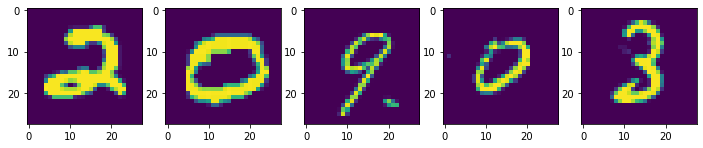

In [44]:
plt.figure(figsize=(12,10))
for i in range(0,5) :
    plt.subplot(1, 5, i+1)
    print_image(i, test)

#### 3.2.4: Assessing Results

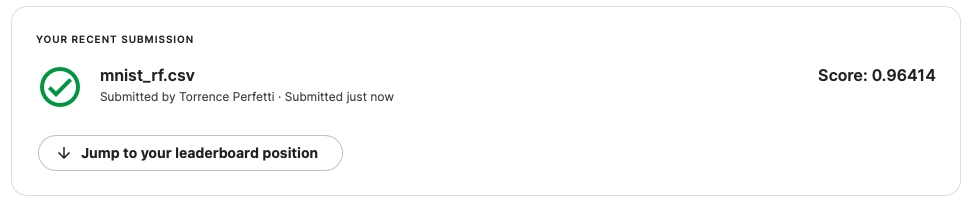

#### 3.3: Principal Component Analysis (PCA)

#### 3.3.1: Understanding Shape & Size

In [45]:
df_x.shape, test.shape

((42000, 784), (28000, 784))

In [46]:
combined = pd.concat([df_x, test])
combined.shape

(70000, 784)

#### 3.3.2: Plotting Explained Variance vs. Dimensions

PCA()

154 principal components account for 95 percent of the variability in the MNIST dataset.


(0.0, 784.0, 0.0, 1.0)

Text(0.5, 0, 'Dimensions')

Text(0, 0.5, 'Explained Variance')

Text(0.5, 1.0, '95% Explained Variance vs. Dimensions for MNIST PCA')

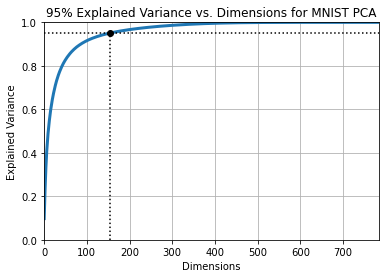

In [47]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(combined)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("{} principal components account for 95 percent of the variability in the MNIST dataset.".format(round(d)))

plt.plot(cumsum, linewidth = 3)
plt.axis([0,784,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([0,784],[0.95,0.95],"k:")
plt.plot([d,d],[0,0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.title("95% Explained Variance vs. Dimensions for MNIST PCA")
plt.show()

#### 3.3.3: Training with PCA

In [48]:
pca = PCA(n_components = 154)
pca.fit(combined)

PCA(n_components=154)

In [49]:
len(pca.components_)

154

In [50]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(test)

In [51]:
y_train.shape, X_train_reduced.shape

((33600,), (33600, 154))

In [52]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 65.766721 secs
CPU times: user 59.4 s, sys: 922 ms, total: 1min
Wall time: 1min 5s


In [53]:
pred = rf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf.csv",index=False)

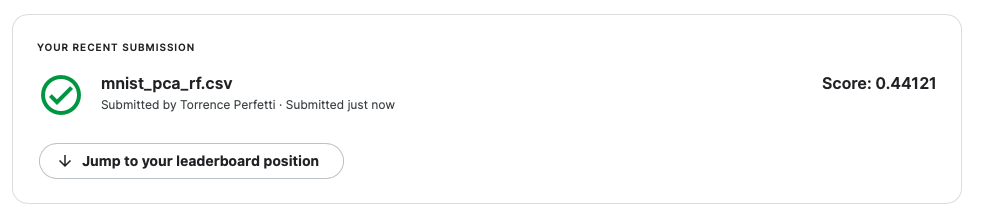

#### 3.4: Flixing Any Flaws

#### 3.4.1: Separate the training set from PCA 

In [54]:
pca = PCA(n_components = 154)
pca.fit(X_train)

PCA(n_components=154)

In [55]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(test)

In [56]:
%%time
from datetime import datetime
start=datetime.now()
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_reduced,y_train)
end=datetime.now()
print("Time taken to run classifier : " + str((end-start).total_seconds()) + " secs")

Time taken to run classifier : 63.837779 secs
CPU times: user 57.9 s, sys: 862 ms, total: 58.8 s
Wall time: 1min 3s


#### 3.4.2: Submitting new results to Kaggle

In [57]:
pred = rf.predict(X_test_reduced)
pred = pd.Series(pred,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_pca_rf_fixed.csv",index=False)

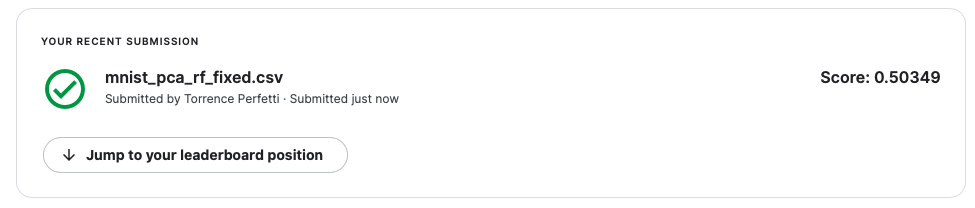

#### 3.5: K-Means Clustering

#### 3.5.1: Normalizing Data

In [58]:
X = X_train.astype(float) / 255.

#### 3.5.2: Initializing & Fitting Model

In [59]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)
kmeans = MiniBatchKMeans(n_clusters = n_digits)
kmeans.fit(X)
kmeans.labels_y = train.loc[:,['label']].values

10


MiniBatchKMeans(n_clusters=10)

array([2, 7, 2, ..., 5, 1, 5], dtype=int32)

In [66]:
Y = train.loc[:,['label']].values

In [67]:
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
     
        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
         
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[1]
 [0]
 [1]
 [4]
 [0]
 [0]
 [7]
 [3]
 [5]
 [3]
 [8]
 [9]
 [1]
 [3]
 [3]
 [1]
 [2]
 [0]
 [7]
 [5]]


#### 3.5.3: Plotting Data

MiniBatchKMeans(n_clusters=36)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 4')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 9')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 3')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 2')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 0')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 8')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 7')

(-0.5, 27.5, 27.5, -0.5)

Text(0.5, 1.0, 'Inferred Label: 1')

(-0.5, 27.5, 27.5, -0.5)

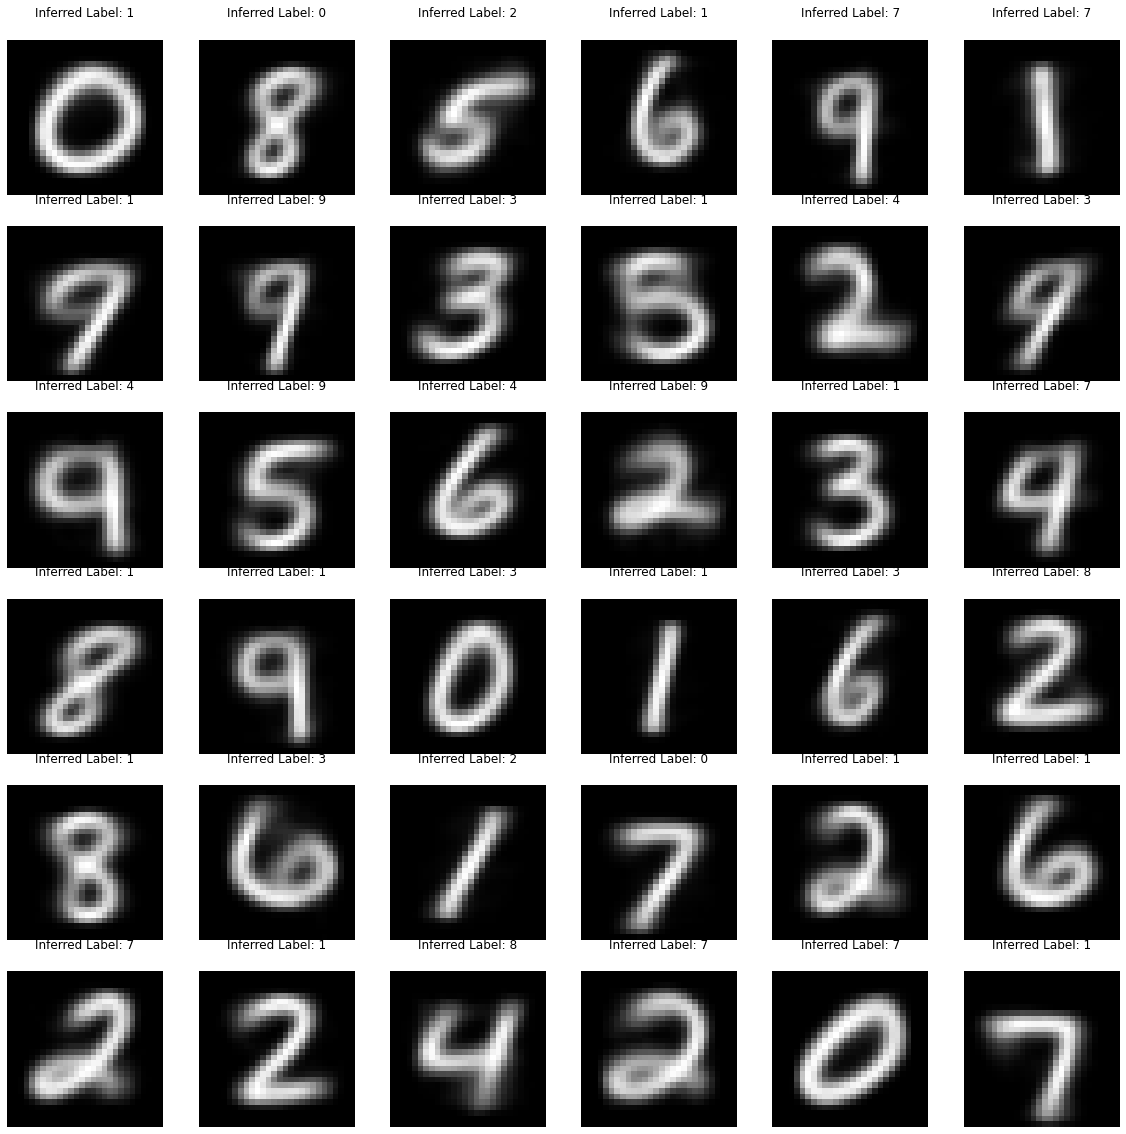

In [68]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

## Conclusion (4.0)

As described in the Module 6 Assignment 1 Requirements section on Canvas, please reference how I addressed each stated requirement/question below:
- <b>Fit a random forest classifier</b> This was addressed in section 3.2.
- <b>Execute principal components analysis (PCA) </b> This was addressed in section 3.3.
- <b>Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels</b>This was addressed in section 3.5.
- <b>Submit the RF Classifier, the PCA RF, and k-means estimations to Kaggle.com</b>This was addressed in section 3.2.4, 3.3.3, 3.4.2.
- <b>The experiment we have proposed has a major design flaw. Identify the flaw.</b>This was addressed in section 3.4.